In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('grid.csv',index_col=0,parse_dates=True)
df

,Pressure_Seeq,Velocity_Seeq,Density_Seeq,Example?Cooling_Tower_1?Area_A?Temperature
Date-Time,,,,
2022-10-15 06:32:00,65.768393,6.704867,2.923131,79.328650
2022-10-15 06:34:00,65.768393,6.712858,2.922820,79.198645
2022-10-15 06:36:00,65.768393,6.720850,2.922509,79.099008
2022-10-15 06:38:00,65.768393,6.728841,2.922198,78.940880
2022-10-15 06:40:00,65.768393,6.736832,2.921887,78.792292
...,...,...,...,...
2022-11-14 16:22:00,61.652592,6.490652,2.948706,94.013000
2022-11-14 16:24:00,61.663415,6.496149,2.949877,94.170426
2022-11-14 16:26:00,61.674237,6.501646,2.951047,94.219934


In [4]:
## Observando la cantidad de datos, y si existen datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21900 entries, 2022-10-15 06:32:00 to 2022-11-14 16:30:00
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Pressure_Seeq                               21900 non-null  float64
 1   Velocity_Seeq                               21900 non-null  float64
 2   Density_Seeq                                21900 non-null  float64
 3   Example?Cooling_Tower_1?Area_A?Temperature  21900 non-null  float64
dtypes: float64(4)
memory usage: 855.5 KB


In [5]:
df.columns

Index(['Pressure_Seeq', 'Velocity_Seeq', 'Density_Seeq',
       'Example?Cooling_Tower_1?Area_A?Temperature'],
      dtype='object')

In [6]:
## Corrigiendo el nombre de la columna Temperatura
df.rename(columns={'Example?Cooling_Tower_1?Area_A?Temperature':'Temperature'},inplace=True)
df.columns

Index(['Pressure_Seeq', 'Velocity_Seeq', 'Density_Seeq', 'Temperature'], dtype='object')

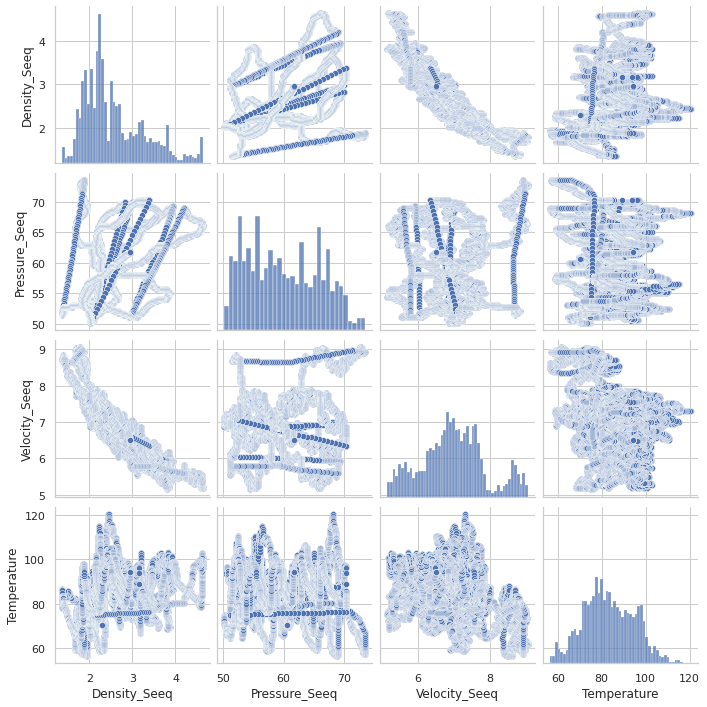

In [7]:
## Entendiendo los datos, correlación de variables, manera visual
sns.set(style='whitegrid',context='notebook')
cols = ['Density_Seeq','Pressure_Seeq','Velocity_Seeq','Temperature']
sns.pairplot(df[cols], height=2.5)
plt.show()

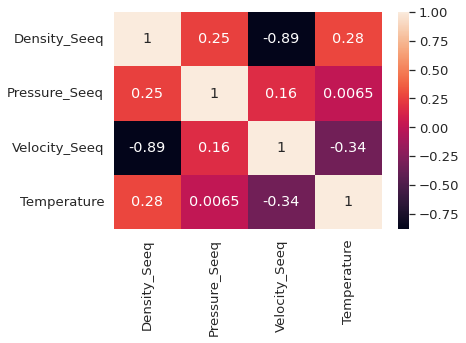

In [119]:
## Calculando coeficiente de correlación, valores entre variables
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.2)
sns.heatmap(cm,cbar=True,annot=True,yticklabels=cols,xticklabels=cols)
plt.show()

In [9]:
df.corr()

,Pressure_Seeq,Velocity_Seeq,Density_Seeq,Temperature
Pressure_Seeq,1.000000,0.164042,0.248691,0.006515
Velocity_Seeq,0.164042,1.000000,-0.885736,-0.339373
Density_Seeq,0.248691,-0.885736,1.000000,0.276808
Temperature,0.006515,-0.339373,0.276808,1.000000


In [10]:
## Calculando el P-Value, para toma de decisiones
from scipy import stats
r , p = stats.pearsonr(df.Density_Seeq,df.Pressure_Seeq)
s , m = stats.pearsonr(df.Density_Seeq,df.Velocity_Seeq)
t , n = stats.pearsonr(df.Density_Seeq,df.Temperature)
print("El valor de p-value, con respecto a la Presión es: ",p)
print("El valor de p-value, con respecto a la Velocidad es: ",m)
print("El valor de p-value, con respecto a la Temperatura es: ",n)

El valor de p-value, con respecto a la Presión es:  5.744552075673404e-306
El valor de p-value, con respecto a la Velocidad es:  0.0
El valor de p-value, con respecto a la Temperatura es:  0.0


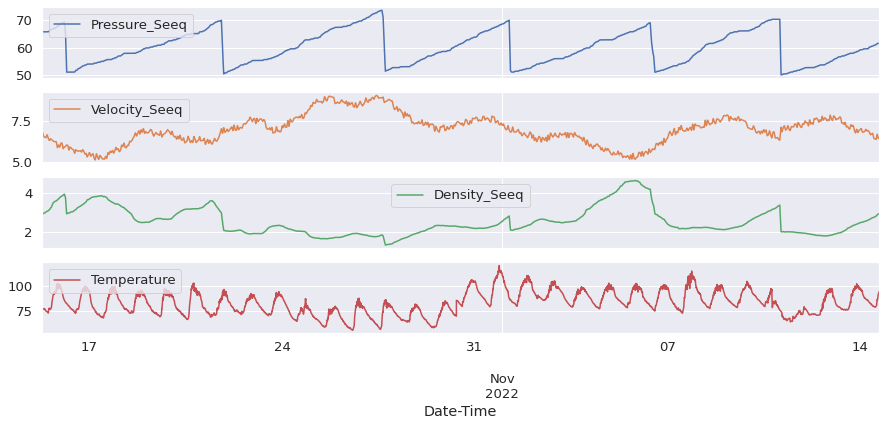

In [11]:
## Mostrando todas las gráficas
axes = df.plot(figsize=(15,6),subplots=True)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [13]:
df.columns

Index(['Pressure_Seeq', 'Velocity_Seeq', 'Density_Seeq', 'Temperature'], dtype='object')

# Regresión Lineal

In [14]:
X_cols = list(set(df.columns)-set(['Density_Seeq']))
Y_cols = ['Density_Seeq']

In [15]:
X = df[X_cols].values
Y = df[Y_cols].values
Y

array([[2.92313058],
       [2.92281957],
       [2.92250855],
       ...,
       [2.95104737],
       [2.95221823],
       [2.95338908]])

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
sc_x=StandardScaler().fit(X)
sc_y=StandardScaler().fit(Y)
print(Y_test)
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)
print(Y_test)

[[3.16476908]
 [2.97225192]
 [2.19775535]
 ...
 [2.81206193]
 [1.74299616]
 [2.21360001]]
[[ 0.85002815]
 [ 0.57558942]
 [-0.52847765]
 ...
 [ 0.34723399]
 [-1.17674991]
 [-0.50589063]]


In [26]:
reg=LinearRegression()
reg=reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)
error = np.sqrt(mean_squared_error(Y_test,Y_predict))
r2 = metrics.r2_score(Y_test,Y_predict)
print("Intercepto: ", reg.intercept_)
print("El error es: ", error)
print("El valor de r2 es: ", r2)
print("Los coeficientes son: ", reg.coef_)

Intercepto:  [0.00023998]
El error es:  0.23112931213555457
El valor de r2 es:  0.9468849778816054
Los coeficientes son:  [[-0.05732963  0.40785208 -0.9708163 ]]


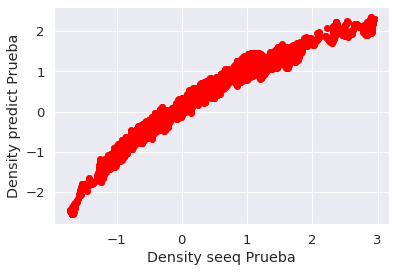

In [125]:
## Análisis Gráfico de resultados
plt.scatter(Y_test,Y_predict,color='red')
plt.xlabel("Density seeq Prueba")
plt.ylabel("Density predict Prueba")
plt.show()

In [79]:
## INGRESANDO LOS DATOS REALES EN NUESTRO MODELO ENTRENADO Y PROBADO
#print(Y_predict)
#print(reg.predict(X))
#print(X)
#print(X_test)
#print(df[X_cols].mean().values)
#print(sc_x.transform(X))
#print(df[X_cols].std().values)
#print(Y)
#print(df[Y_cols].mean().values)
#print(df[Y_cols].std().values)
density_reglineal= (reg.predict(sc_x.transform(X))*df[Y_cols].std().values)+df[Y_cols].mean().values
density_reglineal

array([[3.078531  ],
       [3.07285003],
       [3.06706298],
       ...,
       [2.98393797],
       [2.98089981],
       [2.97732482]])

In [80]:
## Comparamos en el dataframe, los valores de la densidad real con el valor de la densidad regresión lineal
df_density=df.copy()
df_density['Density_regLineal'] = density_reglineal
df_density = df_density.drop(['Pressure_Seeq','Velocity_Seeq','Temperature'],axis=1)
df_density

,Density_Seeq,Density_regLineal
Date-Time,,
2022-10-15 06:32:00,2.923131,3.078531
2022-10-15 06:34:00,2.922820,3.072850
2022-10-15 06:36:00,2.922509,3.067063
2022-10-15 06:38:00,2.922198,3.061480
2022-10-15 06:40:00,2.921887,3.055864
...,...,...
2022-11-14 16:22:00,2.948706,2.992051
2022-11-14 16:24:00,2.949877,2.987806
2022-11-14 16:26:00,2.951047,2.983938


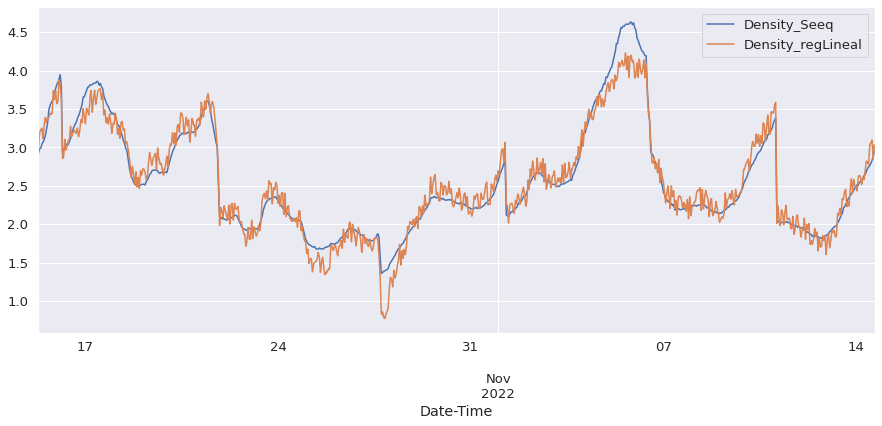

In [81]:
## Graficando todas las densidades obtenidas
axes11 = df_density.plot(figsize=(15,6))

# Regresión Raíz Cuadrática

In [82]:
## Mejorando el modelo - R^2, sacamos raiz cuadrada a las variables independientes
X_cols = list(set(df.columns)-set(['Density_Seeq']))
Y_cols = ['Density_Seeq']

In [86]:
X2 = (df[X_cols]**0.5).values
Y = df[Y_cols].values
print(X2)
print(Y)

[[8.90666324 8.10977145 2.58937588]
 [8.89936204 8.10977145 2.59091847]
 [8.89376233 8.10977145 2.59246014]
 ...
 [9.70669534 7.85329467 2.54983259]
 [9.69700096 7.85398368 2.55091025]
 [9.69522638 7.85467263 2.55198746]]
[[2.92313058]
 [2.92281957]
 [2.92250855]
 ...
 [2.95104737]
 [2.95221823]
 [2.95338908]]


In [87]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y)
sc_x2=StandardScaler().fit(X2)
sc_y2=StandardScaler().fit(Y)
print(Y2_test)
X2_train = sc_x2.transform(X2_train)
X2_test = sc_x2.transform(X2_test)
Y2_train = sc_y2.transform(Y2_train)
Y2_test = sc_y2.transform(Y2_test)
print(Y2_test)

[[1.81493203]
 [2.99398231]
 [3.52525758]
 ...
 [2.66543779]
 [2.02138591]
 [2.51727331]]
[[-1.07420328]
 [ 0.60656671]
 [ 1.36391484]
 ...
 [ 0.13821708]
 [-0.77989735]
 [-0.07299563]]


In [89]:
reg2=LinearRegression()
reg2=reg2.fit(X2_train,Y2_train)
Y2_predict = reg2.predict(X2_test)
error2 = np.sqrt(mean_squared_error(Y2_test,Y2_predict))
r2_2 = metrics.r2_score(Y2_test,Y2_predict)
print("Intercepto: ", reg2.intercept_)
print("El error es: ", error2)
print("El valor de r2 es: ", r2_2)
print("Los coeficientes son: ", reg2.coef_)

Intercepto:  [0.00130591]
El error es:  0.19722578063395485
El valor de r2 es:  0.9589895415238635
Los coeficientes son:  [[-0.04837046  0.3968331  -0.9745371 ]]


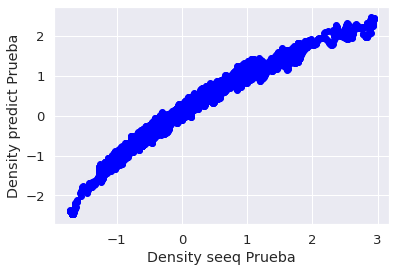

In [90]:
## Análisis de resultados
plt.scatter(Y2_test,Y2_predict,color='blue')
plt.xlabel("Density seeq Prueba")
plt.ylabel("Density predict Prueba")
plt.show()

In [92]:
## INGRESANDO LOS DATOS REALES EN NUESTRO MODELO ENTRENADO Y PROBADO
density_regRaizCuadratica= (reg2.predict(sc_x2.transform(X2))*df[Y_cols].std().values)+df[Y_cols].mean().values
density_regRaizCuadratica

array([[3.05114944],
       [3.04525786],
       [3.03927877],
       ...,
       [2.98122891],
       [2.97786466],
       [2.97407746]])

In [93]:
## Comparamos en el dataframe, los valores de la densidad real con el valor de la densidad regresión lineal y cuadrática
df_density['Density_regRaízCuadrática'] = density_regRaizCuadratica
df_density

,Density_Seeq,Density_regLineal,Density_regRaízCuadrática
Date-Time,,,
2022-10-15 06:32:00,2.923131,3.078531,3.051149
2022-10-15 06:34:00,2.922820,3.072850,3.045258
2022-10-15 06:36:00,2.922509,3.067063,3.039279
2022-10-15 06:38:00,2.922198,3.061480,3.033480
2022-10-15 06:40:00,2.921887,3.055864,3.027657
...,...,...,...
2022-11-14 16:22:00,2.948706,2.992051,2.989575
2022-11-14 16:24:00,2.949877,2.987806,2.985252
2022-11-14 16:26:00,2.951047,2.983938,2.981229


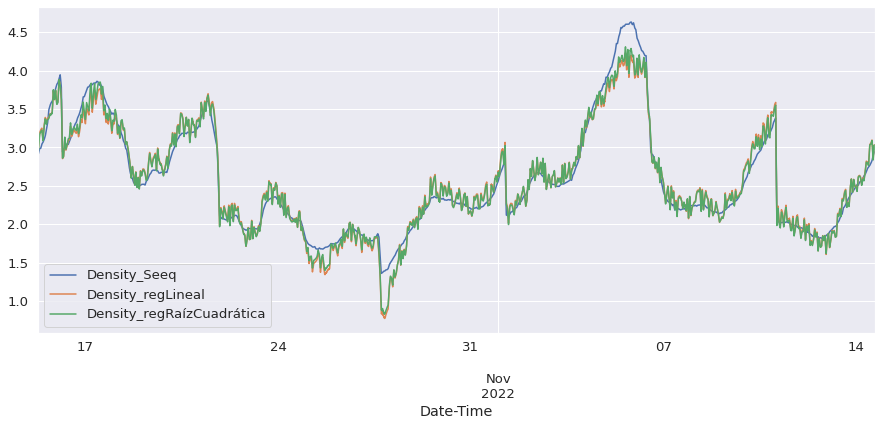

In [94]:
## Graficando todas las densidades obtenidas
axes12 = df_density.plot(figsize=(15,6))

# Regresión Polinomial - Grado 2

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
X_cols = list(set(df.columns)-set(['Density_Seeq']))
Y_cols = ['Density_Seeq']

In [97]:
X = df[X_cols].values
Y = df[Y_cols].values
print(X)
print(Y)

[[79.32865    65.76839298  6.70486742]
 [79.19864463 65.76839298  6.71285849]
 [79.09900847 65.76839298  6.72084957]
 ...
 [94.21993443 61.67423714  6.50164624]
 [94.03182759 61.68505965  6.50714311]
 [93.99741463 61.69588216  6.51263999]]
[[2.92313058]
 [2.92281957]
 [2.92250855]
 ...
 [2.95104737]
 [2.95221823]
 [2.95338908]]


In [105]:
X3_train,X3_test,Y3_train,Y3_test = train_test_split(X,Y)

In [106]:
poly_reg = PolynomialFeatures(degree=2)

In [107]:
X3_train_poly = poly_reg.fit_transform(X3_train)
X3_test_poly = poly_reg.fit_transform(X3_test)
X3_train_poly

array([[1.00000000e+00, 7.50171150e+01, 5.18073540e+01, ...,
        2.68400193e+03, 3.81445656e+02, 5.42103888e+01],
       [1.00000000e+00, 8.95140862e+01, 6.57683930e+01, ...,
        4.32548152e+03, 4.15110924e+02, 3.98376639e+01],
       [1.00000000e+00, 7.10897627e+01, 6.08982631e+01, ...,
        3.70859845e+03, 4.07464335e+02, 4.47681750e+01],
       ...,
       [1.00000000e+00, 8.42733448e+01, 6.96644969e+01, ...,
        4.85314213e+03, 4.67619911e+02, 4.50570734e+01],
       [1.00000000e+00, 7.90507236e+01, 6.57683930e+01, ...,
        4.32548152e+03, 5.00692586e+02, 5.79572621e+01],
       [1.00000000e+00, 1.00620513e+02, 6.28463151e+01, ...,
        3.94965932e+03, 4.77296120e+02, 5.76787941e+01]])

In [109]:
reg3=LinearRegression()
reg3=reg3.fit(X3_train_poly,Y3_train)
Y3_predict=reg3.predict(X3_test_poly)
error3 = np.sqrt(mean_squared_error(Y3_test,Y3_predict))
r2_3 = metrics.r2_score(Y3_test,Y3_predict)
print("Intercepto: ", reg3.intercept_)
print("El error es: ", error3)
print("El valor de r2 es: ", r2_3)
print("Los coeficientes son: ", reg3.coef_)

Intercepto:  [7.52674697]
El error es:  0.08166987432307966
El valor de r2 es:  0.9865002284137545
Los coeficientes son:  [[ 0.00000000e+00 -1.60128046e-03  1.29863895e-01 -2.16336292e+00
  -7.08473759e-06  1.19185491e-04 -6.15175030e-04 -1.02935254e-04
  -1.22971718e-02  1.58218590e-01]]


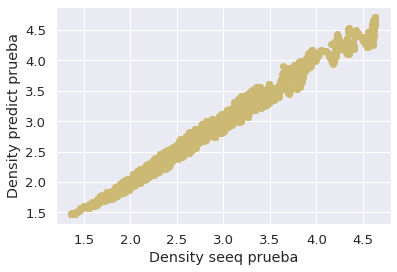

In [111]:
## Análisis de resultados
plt.scatter(Y3_test,Y3_predict,color='y')
plt.xlabel("Density seeq prueba")
plt.ylabel("Density predict prueba")
plt.show()

In [112]:
## INGRESANDO LOS DATOS REALES EN NUESTRO MODELO ENTRENADO Y PROBADO
density_regPolinomialgrado_2 = reg3.predict(poly_reg.fit_transform(X))
density_regPolinomialgrado_2

array([[2.93048512],
       [2.92318117],
       [2.91592829],
       ...,
       [2.93816578],
       [2.93354603],
       [2.92899839]])

In [113]:
## Comparamos en el dataframe, los valores de la densidad real con el valor de la densidad regresión lineal, cuadrática y
## Polinomial grado 2
df_density['Density_regPolinomial_Grado2'] = density_regPolinomialgrado_2
df_density

,Density_Seeq,Density_regLineal,Density_regRaízCuadrática,Density_regPolinomial_Grado2
Date-Time,,,,
2022-10-15 06:32:00,2.923131,3.078531,3.051149,2.930485
2022-10-15 06:34:00,2.922820,3.072850,3.045258,2.923181
2022-10-15 06:36:00,2.922509,3.067063,3.039279,2.915928
2022-10-15 06:38:00,2.922198,3.061480,3.033480,2.908639
2022-10-15 06:40:00,2.921887,3.055864,3.027657,2.901381
...,...,...,...,...
2022-11-14 16:22:00,2.948706,2.992051,2.989575,2.947187
2022-11-14 16:24:00,2.949877,2.987806,2.985252,2.942695
2022-11-14 16:26:00,2.951047,2.983938,2.981229,2.938166


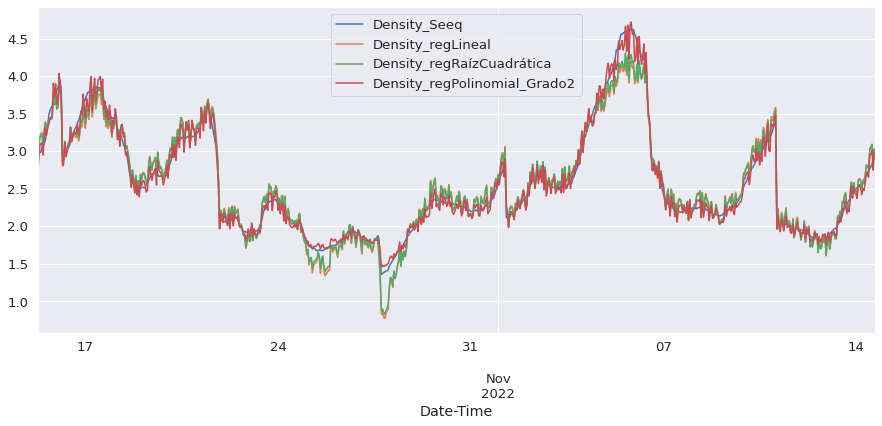

In [114]:
## Graficando todas las densidades obtenidas
axes2 = df_density.plot(figsize=(15,6))